In [384]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import fmin_tnc 
from numpy import log
from sklearn.preprocessing import normalize

In [385]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def prob(theta, x):
    return sigmoid(np.dot(x, theta))
def objective(theta, x, y):
# Computes the (negative of the) objective function, for all the training
    p = prob(theta, x)
    return -np.sum(y * log(p) + (1 - y) * log(1 - p))
def gradient(theta, x, y):
# Computes the gradient of the cost function at the point theta 
    return np.dot(x.T, sigmoid(np.dot(x, theta)) - y)
    # returns array of 3*1 representing the gradient
def fit(x, y, theta):
    return fmin_tnc(func=objective, x0=theta, fprime=gradient, args=(x, y))[0]

In [386]:
data = pd.read_csv("marks.txt")
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
X = np.c_[np.ones((X.shape[0], 1)), X]
## augment with column of ones
# reason for the three parameters now that x is n by 3
# y = target values, last column of the data frame
y = data.iloc[:, -1].to_numpy()
# select the applicants that got admitted vs. not admitted

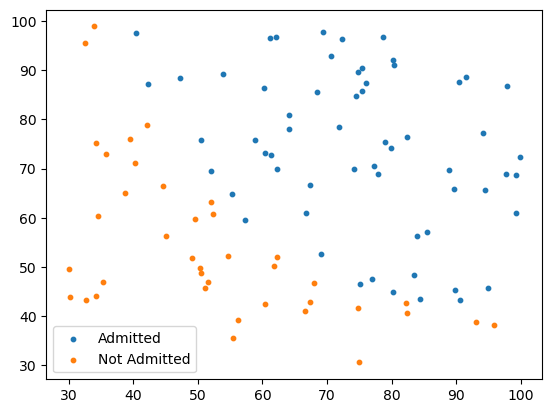

In [387]:
admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted') 
plt.legend() 
plt.show()

In [388]:
def grad_normal(theta, X, y):
    grad = gradient(theta, X, y)
    return grad/np.sqrt(np.dot(grad,grad))

def line_search_3(theta, X, y):
    alpha = 0.5
    beta = 0.5
    t = 1
    count = 0
    grad = gradient(theta, X,y)
    # ensures p falls between 0 and 1
    while any((ele <= 1e-6 or ele >= 1-1e-6) for ele in prob(theta- t*grad, X)):
        t *= beta
    # ensure the line search is above the function value
    while objective((theta - t*gradient(theta, X, y)), X, y)\
    - (objective(theta, X, y) - alpha*t*np.dot(gradient(theta,X,y),gradient(theta,X,y))) > 0:
        t *= beta
        count += 1
    return t


        
def gradient_descent_for(theta, X, y):
    alpha = 0.5
#     obj_prev = objective(theta, X, y)
    grad = gradient(theta, X, y)
    count = 0
    while sum(abs(grad)) > 1e-6:
        t = line_search_3(theta, X, y)
        if count%2000== 0: 
            print(theta, t, sum(abs(grad)))
#             print(objective((theta - t*grad_normal(theta, X, y)), X, y)\
#     - (objective(theta, X, y) - alpha*t*np.dot(grad_normal(theta,X,y),grad_normal(theta,X,y))))
        theta = theta - t*gradient(theta, X, y)
        
        grad = gradient(theta, X, y)
#         obj_curr = objective(theta, X, y)
#         err = obj_curr - obj_prev
#         obj_prev = obj_curr
        
        count += 1
    return theta

In [380]:
line_search_3(np.zeros(3), X, y)

0.015625

In [381]:
gradient_descent_for(np.zeros(3), X, y)

[0. 0. 0.] 0.015625 34.919975588733145


array([-12.79655341,  14.38857753,  13.75368498])

In [279]:
line_search_3(np.zeros(3), X, y)

0.00390625

In [358]:
gradient_descent_for(np.ones(3), X, y)

/var/folders/2q/8ydy93qj5rg98hm1_12pfmrw0000gn/T/ipykernel_1162/4169631582.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
/var/folders/2q/8ydy93qj5rg98hm1_12pfmrw0000gn/T/ipykernel_1162/227736802.py:8: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * log(p) + (1 - y) * log(1 - p))
/var/folders/2q/8ydy93qj5rg98hm1_12pfmrw0000gn/T/ipykernel_1162/227736802.py:8: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * log(p) + (1 - y) * log(1 - p))


[1. 1. 1.] 0.00048828125 4192.459375351651
[ 0.79245141  0.00342021 -0.00377597] 1.52587890625e-05 13.392783834387583
[ 0.60505153  0.00472458 -0.0023562 ] 1.52587890625e-05 12.093758925517871
[ 0.41897397  0.00599889 -0.0009671 ] 1.52587890625e-05 12.92996593645107
[0.23432617 0.00729286 0.00044144] 1.52587890625e-05 12.76130981249261
[0.05112622 0.00857999 0.00184229] 1.52587890625e-05 12.504844420346839
[-0.13053193  0.0098589   0.00323373] 1.52587890625e-05 12.451803654532235
[-0.31041191  0.01113373  0.00461961] 3.0517578125e-05 10.4000147314853
[-0.48852271  0.01241399  0.00600929] 3.0517578125e-05 10.174080484445128
[-0.66465898  0.01366831  0.0073707 ] 1.52587890625e-05 11.674982051681397
[-0.83849614  0.01488243  0.00868903] 3.0517578125e-05 9.42236281536404
[-1.01015765  0.01610154  0.0100099 ] 1.52587890625e-05 11.315579125174274
[-1.17929009  0.01731656  0.01132379] 3.0517578125e-05 9.241259297427499
[-1.34586421  0.01850701  0.01260984] 1.52587890625e-05 10.658719916921937

[-13.55807735   0.11282641   0.10884022] 0.0001220703125 0.9870693136153734
[-13.63925655   0.11347368   0.10948961] 0.000244140625 0.9052475566993796
[-13.72241289   0.11413474   0.11015294] 0.000244140625 0.9021703200765354
[-13.79937301   0.11474828   0.11076858] 0.0001220703125 0.9893655693725848
[-13.88029386   0.11539791   0.11142037] 0.0001220703125 0.9867396893151913
[-13.9599354    0.11603431   0.11205899] 6.103515625e-05 1.0900853372697525
[-14.04133773   0.1166755    0.1127027 ] 1.52587890625e-05 1.5860011229631048
[-14.12916358   0.1173844    0.11341398] 0.0001220703125 0.9363900912560207
[-14.21629695   0.11807266   0.11410499] 1.52587890625e-05 1.5015213456159546
[-14.29843373   0.11872789   0.11476272] 1.52587890625e-05 1.5796382452682995
[-14.37538329   0.11933959   0.11537684] 1.52587890625e-05 1.9869818456032622
[-14.44914929   0.11993962   0.11597892] 6.103515625e-05 0.9210599432181266
[-14.53259465   0.12060628   0.11664821] 6.103515625e-05 0.9441845482502941
[-14.6

[-21.53568633   0.17665099   0.17300684] 1.52587890625e-05 0.329667490891587
[-21.5498292    0.17676498   0.17312148] 1.52587890625e-05 0.40041548169482116
[-21.56197679   0.17685561   0.17321296] 1.52587890625e-05 0.5559540301564814
[-21.57347871   0.17695378   0.17331145] 3.0517578125e-05 0.32159932828381166
[-21.58474411   0.17704292   0.17340117] 6.103515625e-05 0.1980588681962483
[-21.59584531   0.17713228   0.17349105] 3.0517578125e-05 0.24139833962904356
[-21.60678041   0.17722057   0.17357983] 3.0517578125e-05 0.31133236153428206
[-21.61754759   0.1773058    0.17366562] 6.103515625e-05 0.19765204108527495
[-21.62815557   0.17739106   0.17375138] 3.0517578125e-05 0.22418827977561095
[-21.63856011   0.17747419   0.17383501] 6.103515625e-05 0.19645693702562728
[-21.64880894   0.17755713   0.17391842] 3.0517578125e-05 0.28333790624934796
[-21.65885807   0.17763766   0.17399943] 3.0517578125e-05 0.2826478625869631
[-21.66870949   0.17771574   0.174078  ] 6.103515625e-05 0.1882503775

[-22.74841916   0.18637049   0.18278291] 1.52587890625e-05 0.21549776475684468
[-22.7557222    0.18642721   0.18284003] 0.0001220703125 0.11294248378658245
[-22.76301002   0.18648645   0.18289957] 0.0001220703125 0.11175997196591558
[-22.77022144   0.1865444    0.18295783] 6.103515625e-05 0.1255859461822459
[-22.77759888   0.18660084   0.18301472] 1.52587890625e-05 0.2880876644104768
[-22.78484927   0.1866623    0.18307636] 3.0517578125e-05 0.18974205131960487
[-22.79177556   0.18671717   0.18313158] 6.103515625e-05 0.12312588566502869
[-22.79880303   0.18677424   0.18318892] 3.0517578125e-05 0.19705969450019645
[-22.80573657   0.1868298    0.1832448 ] 3.0517578125e-05 0.19507777508862095
[-22.81262114   0.18688445   0.18329978] 3.0517578125e-05 0.13952453328041847
[-22.81952089   0.18693809   0.1833538 ] 3.0517578125e-05 0.1677732745242339
[-22.82623437   0.18699355   0.18340949] 3.0517578125e-05 0.13539354491557976
[-22.8329265    0.18704707   0.18346332] 6.103515625e-05 0.1216740234

[-23.41271895   0.19169423   0.18813593] 3.0517578125e-05 0.12169211354893361
[-23.41755377   0.19173408   0.18817594] 6.103515625e-05 0.07971801583404625
[-23.42241269   0.19177244   0.18821454] 0.0001220703125 0.07354804916288066
[-23.42732022   0.19181096   0.1882533 ] 1.52587890625e-05 0.15462802960681155
[-23.43218212   0.19185175   0.18829422] 3.0517578125e-05 0.11674954117119751
[-23.43696286   0.19188806   0.18833082] 1.52587890625e-05 0.1757024178719282
[-23.44168841   0.19192766   0.18837055] 6.103515625e-05 0.08479551019461573
[-23.44635374   0.19196419   0.18840732] 3.0517578125e-05 0.09357146162148072
[-23.45103335   0.19200244   0.18844573] 0.0001220703125 0.06925430067895089
[-23.45572843   0.19203964   0.18848315] 0.0001220703125 0.0663555050821627
[-23.46034921   0.19207561   0.18851937] 1.52587890625e-05 0.17151588201488632
[-23.46490322   0.19211409   0.18855795] 3.0517578125e-05 0.11228201783335623
[-23.46941869   0.19215041   0.18859446] 3.0517578125e-05 0.12394982

[-23.82853624   0.19502868   0.19148785] 3.0517578125e-05 0.09308662532340306
[-23.83176712   0.19505588   0.19151512] 1.52587890625e-05 0.09815545525839714
[-23.83496996   0.19508138   0.19154076] 3.0517578125e-05 0.08018823875143588
[-23.83816536   0.1951068    0.19156632] 6.103515625e-05 0.05966123326596284
[-23.84137168   0.19513159   0.19159129] 3.0517578125e-05 0.09446632546707634
[-23.84459266   0.19515755   0.19161737] 3.0517578125e-05 0.08233692502979578
[-23.84772518   0.19518289   0.19164284] 6.103515625e-05 0.060340378959280905
[-23.85084711   0.19520865   0.19166869] 3.0517578125e-05 0.0740528057888154
[-23.85397271   0.195233     0.1916932 ] 6.103515625e-05 0.05951070144562692
[-23.85708719   0.19525845   0.19171876] 0.0001220703125 0.050432650699170856
[-23.86018822   0.19528343   0.19174386] 6.103515625e-05 0.061206511869694724
[-23.86329086   0.19530855   0.19176909] 3.0517578125e-05 0.08412313752969053
[-23.86636413   0.19533326   0.19179393] 3.0517578125e-05 0.090697

[-24.11219327   0.19730392   0.1937746 ] 6.103515625e-05 0.042816568465387395
[-24.11437661   0.19732184   0.19379259] 6.103515625e-05 0.043687013630334615
[-24.11655163   0.19733928   0.19381012] 6.103515625e-05 0.04315802524379697
[-24.11871656   0.19735667   0.19382759] 6.103515625e-05 0.04571385665512828
[-24.1208736    0.19737421   0.1938452 ] 3.0517578125e-05 0.06878608312089873
[-24.12302173   0.19739075   0.19386186] 6.103515625e-05 0.043926876714072804
[-24.12516061   0.19740856   0.19387973] 3.0517578125e-05 0.06605856041804786
[-24.12729066   0.19742541   0.19389667] 6.103515625e-05 0.0429707918206349
[-24.12941156   0.19744266   0.193914  ] 3.0517578125e-05 0.06608707292535743
[-24.13152373   0.19745894   0.19393039] 6.103515625e-05 0.04359941270253298
[-24.13362682   0.19747648   0.19394798] 3.0517578125e-05 0.06696771036528354
[-24.13572127   0.19749304   0.19396464] 6.103515625e-05 0.043903820492624035
[-24.13780812   0.19750974   0.19398143] 6.103515625e-05 0.0407555754

[-24.31379693   0.19892091   0.19539957] 6.103515625e-05 0.02940804559232546
[-24.31545579   0.19893448   0.1954132 ] 6.103515625e-05 0.03041668100771866
[-24.31710957   0.19894748   0.19542628] 6.103515625e-05 0.028989877337657566
[-24.31875904   0.19896072   0.19543958] 0.0001220703125 0.027679303388288723
[-24.320405     0.1989739    0.19545283] 6.103515625e-05 0.0296678854458845
[-24.3220459    0.19898707   0.19546606] 6.103515625e-05 0.0288387312261984
[-24.32368252   0.19900044   0.19547948] 6.103515625e-05 0.027998612419181113
[-24.32531489   0.19901353   0.19549264] 6.103515625e-05 0.027843461929632496
[-24.326943     0.19902635   0.19550553] 6.103515625e-05 0.028380578660366473
[-24.32856687   0.19903937   0.19551861] 6.103515625e-05 0.02893411751053665
[-24.3301865    0.19905262   0.19553192] 6.103515625e-05 0.029616217522361876
[-24.33180115   0.19906532   0.19554469] 6.103515625e-05 0.02803498007831573
[-24.33341233   0.1990785    0.19555792] 6.103515625e-05 0.0295250081796

[-24.46660998   0.20014662   0.19663122] 6.103515625e-05 0.020622556156096095
[-24.46784555   0.20015651   0.19664117] 6.103515625e-05 0.022257226596272495
[-24.46907668   0.20016657   0.19665126] 0.0001220703125 0.019564347851096175
[-24.4703051    0.20017625   0.196661  ] 6.103515625e-05 0.021159871753728132
[-24.47152966   0.20018626   0.19667105] 6.103515625e-05 0.020944410718710893
[-24.47275039   0.20019588   0.19668072] 0.0001220703125 0.0199061437210295
[-24.47396786   0.20020564   0.19669053] 0.0001220703125 0.019817665885913383
[-24.47518207   0.20021555   0.19670048] 6.103515625e-05 0.02066649614692917
[-24.47639248   0.20022508   0.19671006] 6.103515625e-05 0.020720307231981372
[-24.4775991    0.20023492   0.19671994] 0.0001220703125 0.019038200271724426
[-24.47880305   0.2002444    0.19672948] 6.103515625e-05 0.021577861333322734
[-24.48000267   0.20025404   0.19673916] 6.103515625e-05 0.01995656551428282
[-24.48119908   0.2002638    0.19674896] 6.103515625e-05 0.019409704

[-24.57929769   0.20105052   0.19753944] 6.103515625e-05 0.015068578977122882
[-24.58020051   0.20105776   0.19754672] 6.103515625e-05 0.014683055051551097
[-24.58110089   0.20106512   0.1975541 ] 6.103515625e-05 0.015490264312999158
[-24.58199843   0.20107217   0.19756119] 6.103515625e-05 0.0159995731835898
[-24.58289314   0.20107949   0.19756854] 6.103515625e-05 0.015411325837876078
[-24.58378502   0.20108652   0.1975756 ] 6.103515625e-05 0.014532560621159596
[-24.58467449   0.20109365   0.19758277] 6.103515625e-05 0.014854810305427901
[-24.58556116   0.20110076   0.19758992] 6.103515625e-05 0.014542721320562002
[-24.58644541   0.20110799   0.19759717] 6.103515625e-05 0.015471488158053659
[-24.58732649   0.20111504   0.19760426] 0.0001220703125 0.013827962061819465
[-24.58820518   0.20112198   0.19761123] 0.0001220703125 0.013803622185359576
[-24.58908149   0.201129     0.19761829] 6.103515625e-05 0.014856633883293613
[-24.58995503   0.201136     0.19762532] 6.103515625e-05 0.0153863

[-24.66125877   0.20170807   0.19820008] 6.103515625e-05 0.010787571575894273
[-24.66191229   0.2017133    0.19820534] 0.0001220703125 0.009888347621552884
[-24.66256402   0.20171845   0.19821052] 0.0001220703125 0.010246132416817932
[-24.66321369   0.20172374   0.19821583] 0.0001220703125 0.010038643453146756
[-24.66386158   0.20172895   0.19822107] 6.103515625e-05 0.01119550223827992
[-24.66450714   0.20173403   0.19822617] 6.103515625e-05 0.010549578662790715
[-24.66515094   0.20173919   0.19823136] 6.103515625e-05 0.011048766201377846
[-24.6657927    0.20174434   0.19823653] 6.103515625e-05 0.011230602110248067
[-24.66643242   0.20174947   0.19824168] 6.103515625e-05 0.011053254602639284
[-24.66707013   0.20175459   0.19824683] 6.103515625e-05 0.010550810983596004
[-24.66770581   0.2017597    0.19825196] 0.0001220703125 0.00982189107886322
[-24.66833975   0.20176486   0.19825715] 6.103515625e-05 0.01005147399778017
[-24.66897169   0.20176985   0.19826216] 6.103515625e-05 0.01027426

[-24.72043425   0.20218266   0.1986769 ] 6.103515625e-05 0.00805009666547607
[-24.72090491   0.20218651   0.19868076] 6.103515625e-05 0.007547327747733035
[-24.72137407   0.20219021   0.19868448] 0.0001220703125 0.007139005249499397
[-24.72184195   0.20219396   0.19868825] 6.103515625e-05 0.007513973196107027
[-24.72230835   0.2021977    0.19869201] 6.103515625e-05 0.007773948375626172
[-24.72277326   0.20220143   0.19869575] 6.103515625e-05 0.007880414804908864
[-24.7232367    0.20220514   0.19869949] 6.103515625e-05 0.00781538074440491
[-24.72369867   0.20220885   0.19870321] 6.103515625e-05 0.007586426016649606
[-24.72415917   0.20221255   0.19870693] 0.0001220703125 0.007225878186252754
[-24.72461841   0.2022163    0.19871069] 6.103515625e-05 0.007726220320257826
[-24.725076     0.20221996   0.19871437] 0.0001220703125 0.007036477292784449
[-24.72553233   0.20222356   0.19871799] 6.103515625e-05 0.007387999719428828
[-24.72598721   0.20222728   0.19872172] 6.103515625e-05 0.0074194

[-24.76297711   0.20252394   0.19901977] 6.103515625e-05 0.005496958463898749
[-24.763315     0.20252665   0.19902249] 6.103515625e-05 0.005511987975757138
[-24.76365181   0.20252935   0.1990252 ] 6.103515625e-05 0.005445130011589527
[-24.76398755   0.20253205   0.19902791] 6.103515625e-05 0.005302684032633009
[-24.76432223   0.20253474   0.19903061] 0.0001220703125 0.005098600991613522
[-24.76465599   0.20253746   0.19903334] 6.103515625e-05 0.005534711279677529
[-24.76498854   0.20254012   0.19903602] 0.0001220703125 0.005144109404323749
[-24.76532018   0.20254274   0.19903865] 6.103515625e-05 0.005571240499974817
[-24.76565063   0.20254539   0.19904131] 0.0001220703125 0.005048004644077286
[-24.76598016   0.20254808   0.19904401] 6.103515625e-05 0.005159563647465948
[-24.76630865   0.20255067   0.19904661] 6.103515625e-05 0.005345663197528716
[-24.7666361    0.20255334   0.1990493 ] 6.103515625e-05 0.005327834685369681
[-24.76696251   0.20255591   0.19905188] 6.103515625e-05 0.00535

[-24.79324008   0.20276674   0.19926369] 6.103515625e-05 0.0037838066973940876
[-24.79348292   0.20276866   0.19926561] 6.103515625e-05 0.004086817511392726
[-24.7937249    0.2027706    0.19926757] 0.0001220703125 0.0036943105826677813
[-24.7939662    0.20277257   0.19926954] 6.103515625e-05 0.0037959467356831755
[-24.79420674   0.20277446   0.19927145] 6.103515625e-05 0.003969698649009756
[-24.79444652   0.20277643   0.19927341] 6.103515625e-05 0.004016198043813368
[-24.79468553   0.2027783    0.1992753 ] 6.103515625e-05 0.00411029462652468
[-24.79492378   0.20278025   0.19927726] 6.103515625e-05 0.004071750022442644
[-24.79516128   0.20278212   0.19927914] 6.103515625e-05 0.004072798674568889
[-24.79539802   0.20278406   0.19928108] 6.103515625e-05 0.003943399160178496
[-24.79563401   0.20278591   0.19928295] 6.103515625e-05 0.0038648784648617207
[-24.79586924   0.20278783   0.19928488] 6.103515625e-05 0.003664845571058173
[-24.79610373   0.20278969   0.19928674] 0.0001220703125 0.00

[-24.81497312   0.20294105   0.1994388 ] 6.103515625e-05 0.0028994644774108513
[-24.81514733   0.20294245   0.19944021] 0.0001220703125 0.002647901651179896
[-24.81532106   0.20294387   0.19944163] 6.103515625e-05 0.002760742573664321
[-24.81549424   0.20294523   0.199443  ] 6.103515625e-05 0.0029423574295194266
[-24.81566679   0.20294662   0.1994444 ] 0.0001220703125 0.0026239897100555076
[-24.81583887   0.20294802   0.1994458 ] 6.103515625e-05 0.002675127925128029
[-24.81601041   0.20294938   0.19944716] 6.103515625e-05 0.0027839400305320616
[-24.81618139   0.20295077   0.19944857] 6.103515625e-05 0.002809335527114154
[-24.81635184   0.20295211   0.19944992] 6.103515625e-05 0.002880192011555316
[-24.81652174   0.2029535    0.19945131] 6.103515625e-05 0.0028662930018668042
[-24.8166911    0.20295484   0.19945265] 6.103515625e-05 0.0028917234720986507
[-24.81685992   0.20295622   0.19945404] 6.103515625e-05 0.002832718545057178
[-24.81702821   0.20295754   0.19945537] 6.103515625e-05 0

[-24.83056363   0.20306612   0.19956445] 6.103515625e-05 0.0021162688528055806
[-24.83068854   0.20306713   0.19956546] 0.0001220703125 0.0018679145935913688
[-24.8308131    0.20306814   0.19956648] 0.0001220703125 0.0018857072763649452
[-24.83093727   0.20306912   0.19956746] 6.103515625e-05 0.0019489479151327815
[-24.83106104   0.20307013   0.19956847] 6.103515625e-05 0.001953500046461998
[-24.83118442   0.2030711    0.19956945] 6.103515625e-05 0.001998000498014574
[-24.83130741   0.20307211   0.19957046] 6.103515625e-05 0.0019840451253334557
[-24.83143      0.20307307   0.19957143] 6.103515625e-05 0.002007006257197741
[-24.83155221   0.20307407   0.19957243] 6.103515625e-05 0.001971948115744415
[-24.83167402   0.20307503   0.1995734 ] 6.103515625e-05 0.001973736018581862
[-24.83179545   0.20307602   0.19957439] 6.103515625e-05 0.001918193139947677
[-24.8319165    0.20307698   0.19957535] 6.103515625e-05 0.0019022781200851435
[-24.83203716   0.20307796   0.19957634] 0.0001220703125 0

[-24.84173959   0.20315578   0.19965452] 6.103515625e-05 0.0015254353430523837
[-24.84182911   0.20315651   0.19965525] 0.0001220703125 0.001329577527077297
[-24.84191838   0.20315723   0.19965597] 6.103515625e-05 0.0013701377926464975
[-24.84200736   0.20315794   0.19965669] 6.103515625e-05 0.0014089579976550581
[-24.84209606   0.20315865   0.1996574 ] 6.103515625e-05 0.0014451227392413557
[-24.84218448   0.20315936   0.19965811] 6.103515625e-05 0.0014777377016709226
[-24.84227261   0.20316007   0.19965883] 6.103515625e-05 0.0015059522091203092
[-24.84236043   0.20316076   0.19965952] 0.0001220703125 0.0013144155999970097
[-24.84244801   0.20316146   0.19966023] 0.0001220703125 0.0013248903230705933
[-24.84253531   0.20316216   0.19966093] 0.0001220703125 0.0013311761547861733
[-24.84262233   0.20316286   0.19966163] 0.0001220703125 0.001333053184844113
[-24.84270907   0.20316356   0.19966233] 0.0001220703125 0.0013304106720549713
[-24.84279554   0.20316425   0.19966303] 0.00012207031

[-24.84974701   0.20322002   0.19971905] 0.0001220703125 0.000989865119837452
[-24.84981116   0.20322053   0.19971957] 6.103515625e-05 0.0010069340311962272
[-24.8498751    0.20322104   0.19972008] 6.103515625e-05 0.0010222202948823034
[-24.84993884   0.20322156   0.19972059] 6.103515625e-05 0.0010354213709652393
[-24.85000238   0.20322207   0.19972111] 6.103515625e-05 0.0010462650794824668
[-24.85006571   0.20322257   0.19972162] 6.103515625e-05 0.0010545190882866873
[-24.85012885   0.20322308   0.19972212] 6.103515625e-05 0.0010599967073607885
[-24.85019178   0.20322358   0.19972263] 6.103515625e-05 0.001062565304589591
[-24.85025451   0.20322409   0.19972314] 6.103515625e-05 0.00106214611703348
[-24.85031704   0.20322459   0.19972364] 6.103515625e-05 0.0010587192425591807
[-24.85037938   0.20322509   0.19972414] 6.103515625e-05 0.001052324025699325
[-24.85044151   0.20322559   0.19972464] 6.103515625e-05 0.0010430558751395314
[-24.85050345   0.20322608   0.19972514] 6.103515625e-05 

[-24.85543617   0.20326566   0.1997649 ] 0.0001220703125 0.0006899380842225744
[-24.85548227   0.20326603   0.19976527] 6.103515625e-05 0.0007644582002110933
[-24.8555282    0.20326639   0.19976564] 6.103515625e-05 0.0007254913455664314
[-24.85557398   0.20326677   0.19976601] 0.0001220703125 0.0006733821108112492
[-24.85561963   0.20326713   0.19976638] 6.103515625e-05 0.0007397433115561292
[-24.85566512   0.20326749   0.19976674] 0.0001220703125 0.0006999826727133174
[-24.85571049   0.20326786   0.19976711] 6.103515625e-05 0.0007673438773548868
[-24.85575569   0.20326823   0.19976748] 6.103515625e-05 0.0007038821277309815
[-24.85580077   0.20326859   0.19976784] 6.103515625e-05 0.0007731851209775709
[-24.85584569   0.20326894   0.1997682 ] 6.103515625e-05 0.0007213611201744019
[-24.85589046   0.20326931   0.19976856] 0.0001220703125 0.0006606139796703214
[-24.85593511   0.20326967   0.19976892] 6.103515625e-05 0.0007159718928103631
[-24.85597959   0.20327002   0.19976928] 0.000122070

[-24.85952298   0.20329844   0.19979783] 6.103515625e-05 0.0005323893293402993
[-24.85955608   0.20329871   0.1997981 ] 0.0001220703125 0.0004978008788348864
[-24.85958908   0.20329898   0.19979837] 6.103515625e-05 0.0005367296938187938
[-24.85962196   0.20329924   0.19979863] 0.0001220703125 0.00049830652171301
[-24.85965475   0.2032995    0.19979889] 6.103515625e-05 0.0005510537150901218
[-24.85968743   0.20329976   0.19979916] 6.103515625e-05 0.00051022413637003
[-24.85972001   0.20330003   0.19979942] 6.103515625e-05 0.0005503803938257112
[-24.85975248   0.20330029   0.19979969] 6.103515625e-05 0.0005063283823945053
[-24.85978486   0.20330054   0.19979994] 6.103515625e-05 0.0005582489041574545
[-24.85981712   0.2033008    0.1998002 ] 6.103515625e-05 0.0005127893752658874
[-24.85984929   0.20330106   0.19980047] 6.103515625e-05 0.0005513259941840598
[-24.85988134   0.20330132   0.19980072] 6.103515625e-05 0.0005036696000040308
[-24.85991331   0.20330157   0.19980098] 6.103515625e-05

[-24.86245824   0.20332199   0.19982149] 6.103515625e-05 0.00040082811305075516
[-24.86248201   0.20332218   0.19982168] 6.103515625e-05 0.0003917880872956747
[-24.8625057    0.20332237   0.19982187] 6.103515625e-05 0.0003742929474459533
[-24.86252932   0.20332256   0.19982206] 6.103515625e-05 0.0003666734465060939
[-24.86255286   0.20332275   0.19982225] 0.0001220703125 0.0003499579238581685
[-24.86257634   0.20332294   0.19982244] 6.103515625e-05 0.00039852006183782596
[-24.86259974   0.20332312   0.19982263] 6.103515625e-05 0.0003872621654515962
[-24.86262306   0.20332331   0.19982282] 6.103515625e-05 0.00036807753213419225
[-24.8626463   0.2033235   0.199823 ] 0.0001220703125 0.0003589312613097029
[-24.86266947   0.20332369   0.19982319] 0.0001220703125 0.00034105702047459996
[-24.86269258   0.20332387   0.19982338] 6.103515625e-05 0.00038551784441032133
[-24.8627156    0.20332405   0.19982356] 6.103515625e-05 0.00037323097980690445
[-24.86273856   0.20332424   0.19982375] 6.103515

[-24.86456617   0.2033389    0.19983848] 6.103515625e-05 0.0002897542208351034
[-24.86458323   0.20333904   0.19983861] 0.0001220703125 0.00025953941420642224
[-24.86460025   0.20333917   0.19983875] 6.103515625e-05 0.0002699215839706559
[-24.86461722   0.20333931   0.19983889] 6.103515625e-05 0.00028132184446538755
[-24.86463412   0.20333945   0.19983902] 0.0001220703125 0.00024643367146437445
[-24.86465098   0.20333958   0.19983916] 0.0001220703125 0.0002555842064768665
[-24.86466778   0.20333972   0.1998393 ] 6.103515625e-05 0.00026557358266832143
[-24.86468453   0.20333985   0.19983943] 6.103515625e-05 0.0002764519544585786
[-24.86470122   0.20333998   0.19983956] 0.0001220703125 0.0002476432291337316
[-24.86471786   0.20334012   0.1998397 ] 0.0001220703125 0.00025591157603954695
[-24.86473445   0.20334025   0.19983983] 6.103515625e-05 0.00026486765983912974
[-24.86475098   0.20334038   0.19983996] 6.103515625e-05 0.0002745447135094059
[-24.86476747   0.20334051   0.1998401 ] 6.103

[-24.86606754   0.20335095   0.19985058] 6.103515625e-05 0.00020592047586021067
[-24.86607983   0.20335104   0.19985068] 6.103515625e-05 0.00020139071871061454
[-24.86609209   0.20335114   0.19985077] 6.103515625e-05 0.00019694434208161749
[-24.86610431   0.20335124   0.19985087] 6.103515625e-05 0.00019258792565313154
[-24.86611649   0.20335134   0.19985097] 6.103515625e-05 0.00018832744704233573
[-24.86612863   0.20335144   0.19985107] 0.0001220703125 0.0001841681058852851
[-24.86614073   0.20335153   0.19985117] 0.0001220703125 0.0001801144180071379
[-24.86615279   0.20335163   0.19985126] 0.0001220703125 0.000176170362893302
[-24.86616482   0.20335172   0.19985136] 6.103515625e-05 0.000204704608705919
[-24.86617681   0.20335182   0.19985145] 6.103515625e-05 0.00019940352390579452
[-24.86618876   0.20335192   0.19985155] 6.103515625e-05 0.00019427461067844654
[-24.86620067   0.20335201   0.19985165] 6.103515625e-05 0.00018932005286886877
[-24.86621254   0.20335211   0.19985174] 6.103

[-24.86714902   0.20335962   0.19985929] 6.103515625e-05 0.0001461980538274288
[-24.86715787   0.20335969   0.19985936] 6.103515625e-05 0.00013656443648979444
[-24.8671667    0.20335976   0.19985943] 6.103515625e-05 0.00015284670689608149
[-24.8671755    0.20335983   0.1998595 ] 6.103515625e-05 0.00014244165176391377
[-24.86718427   0.2033599    0.19985957] 0.0001220703125 0.00013348720884609477
[-24.86719302   0.20335997   0.19985965] 6.103515625e-05 0.00014508228759346764
[-24.86720174   0.20336004   0.19985972] 6.103515625e-05 0.00013517771246596144
[-24.86721042   0.20336011   0.19985979] 0.0001220703125 0.0001266771830651381
[-24.86721909   0.20336018   0.19985985] 6.103515625e-05 0.00014048979413472384
[-24.86722772   0.20336025   0.19985992] 0.0001220703125 0.00013141123141691136
[-24.86723633   0.20336032   0.19985999] 6.103515625e-05 0.00014255019771081123
[-24.86724491   0.20336039   0.19986006] 6.103515625e-05 0.00013259883625771351
[-24.86725346   0.20336046   0.19986013] 6

[-24.867928     0.20336587   0.19986557] 0.0001220703125 9.620278608546418e-05
[-24.86793438   0.20336592   0.19986562] 6.103515625e-05 0.00010379742340926867
[-24.86794074   0.20336597   0.19986567] 0.0001220703125 9.446849413141667e-05
[-24.86794708   0.20336602   0.19986572] 6.103515625e-05 9.893625791590477e-05
[-24.8679534    0.20336607   0.19986577] 6.103515625e-05 0.00010694206011674368
[-24.8679597    0.20336612   0.19986582] 0.0001220703125 9.6752460511218e-05
[-24.86796598   0.20336617   0.19986587] 6.103515625e-05 0.00010170939693954217
[-24.86797223   0.20336622   0.19986592] 0.0001220703125 9.211489084759439e-05
[-24.86797847   0.20336627   0.19986597] 6.103515625e-05 9.905153318978677e-05
[-24.86798469   0.20336632   0.19986603] 6.103515625e-05 0.00010448710949273465
[-24.86799089   0.20336637   0.19986608] 0.0001220703125 9.410780535634711e-05
[-24.86799707   0.20336642   0.19986612] 6.103515625e-05 0.00010133409203483268
[-24.86800323   0.20336647   0.19986617] 0.000122

[-24.86849377   0.20337041   0.19987013] 0.0001220703125 7.172558789669825e-05
[-24.86849836   0.20337045   0.19987017] 3.0517578125e-05 0.00010373809267383294
[-24.86850293   0.20337048   0.1998702 ] 0.000244140625 6.0928354892797465e-05
[-24.86850749   0.20337052   0.19987024] 3.0517578125e-05 0.00010271200528499946
[-24.86851203   0.20337055   0.19987027] 6.103515625e-05 7.408274765430267e-05
[-24.86851656   0.20337059   0.19987031] 6.103515625e-05 7.32938577985287e-05
[-24.86852108   0.20337063   0.19987035] 3.0517578125e-05 0.00010166211321516183
[-24.86852558   0.20337066   0.19987038] 0.0001220703125 6.864183237698107e-05
[-24.86853006   0.2033707    0.19987042] 1.52587890625e-05 0.0001695217466480825
[-24.86853453   0.20337073   0.19987046] 0.0001220703125 6.830728658213658e-05
[-24.86853901   0.20337077   0.19987049] 0.0001220703125 6.841015721625876e-05
[-24.86854345   0.20337081   0.19987053] 3.0517578125e-05 0.00010025808279479076
[-24.86854788   0.20337084   0.19987056] 0.

KeyboardInterrupt: 

In [359]:
# [-24.86863177   0.20337152   0.19987124] 2.2737367544323206e-13 0.00010236400876972862
theta_star = fit(X, y, np.zeros(3))
print(theta_star) 

[-25.02498022   0.20462579   0.20113116]


  NIT   NF   F                       GTG
    0    1  6.862157087543459E+01   2.84211917E+06
tnc: fscale = 0.00059317
    1    3  6.214125236311505E+01   7.20777561E+03
    2    5  6.205441634509957E+01   1.08733492E+04
    3    7  6.036224285562546E+01   1.62165906E+04
    4    9  6.029361320412370E+01   3.56464738E+04
tnc: stepmx = 1000
    5   12  2.713218507042404E+01   1.46064524E+05
    6   14  2.650322012764036E+01   1.13151736E+05
    7   16  2.592458192655444E+01   1.62874029E+03
tnc: fscale = 0.0247784
    8   18  2.581407098937884E+01   4.36997433E+03
    9   20  2.577965961655773E+01   3.32461276E+01
   10   25  2.176463407925841E+01   1.26691597E+05
   11   27  2.063784201206494E+01   4.87296873E+03
   12   29  2.026428477141474E+01   6.00863835E+02
   13   31  2.025355896891719E+01   4.21051353E+01
   14   33  2.025161713427665E+01   5.09451102E-01
tnc: fscale = 1.40103
   15   35  2.025153993406846E+01   1.17007992E-03
tnc: fscale = 29.2343
tnc: |fn-fn-1] = 1.25469e-08 ->

In [354]:
def gradient_descent_3(theta, X, y):
    obj_prev = objective(theta, X, y)
    grad = gradient(theta, X, y)
    err = 1
    count = 0
    while sum(abs(grad)) > 1e-6:
        count += 1
        t = line_search_3(theta, X, y)
        if count%10000 == 0:
            print(theta, t)
        theta = theta - t*grad_normal(theta, X, y)
        grad = gradient(theta, X, y)
        obj_curr = objective(theta, X, y)
        err = obj_curr - obj_prev
        obj_prev = obj_curr
        
    return theta